In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
from keras.utils import plot_model

In [2]:
# The data describe the characteristics of a house (surface, number of rooms...)
# and you should predict its price

# The metrics for the ranking will be based on the mean square error ('mse')

df_train = pd.read_csv("Train.csv")
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,77747,50,1,1,72,98938,8,10,2014,0,1,4829,4204,455,0,3,7786197.4
1,28459,52,0,0,4,50114,1,7,2012,1,1,3570,9363,318,0,6,2846923.2
2,34668,69,1,1,12,17366,8,7,2002,0,1,3476,7549,503,1,7,3475230.2
3,64335,4,0,0,83,65939,6,9,2020,1,0,7301,6989,802,0,1,6435779.0
4,22875,86,1,0,95,8661,5,7,1994,0,0,6394,2119,542,0,7,2295511.4


In [3]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,92649,31,0,0,77,56098,10,8,1991,1,1,6811,2656,429,1,8,9271774.1
1,42485,1,0,0,40,23782,7,7,2017,0,1,974,9553,426,0,3,4251851.7
2,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4
3,2372,41,1,0,5,60320,1,1,2003,0,0,8041,7294,736,1,4,241014.3
4,60514,46,1,1,35,76413,2,1,2019,1,0,9227,737,340,0,8,6059360.9


In [4]:
# Separate input data/output data and store into numpy array

X_train = np.array(df_train.drop('price', axis=1))
y_train = np.array(df_train['price'])/10000

X_test = np.array(df_test.drop('price', axis=1))
y_test = np.array(df_test['price'])/10000

In [5]:
min, max = np.min(X_train, axis = 0), np.max(X_train, axis = 0)

X_train = (X_train - min)/(max - min)
X_test = (X_test - min)/(max - min)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 16) (8000,)
(1000, 16) (1000,)


In [12]:
# define model

def create_model() :

    # Input layer
    x0 = [Input(shape = (16, )) for _ in range (16)]

    # Hiddens layer
    x1 = [Dense(3, input_dim = 16, activation = "relu")(x) for x in x0]

    x2 = [Dense(3, activation = "relu")(x) for x in x1]

    x3 = [Dense(3, activation = "relu")(x) for x in x2]

    x3_temp = x3.copy()

    x4 = [Concatenate()([x3[i], x3[i + 1]]) for i in range (0, len(x3), 2)]

    x5 = [Dense(6, activation = "relu")(x) for x in x4]

    x6 = [Dense(5, activation = "relu")(x) for x in x5]

    x7 = [Concatenate()([x6[i], x6[i + 1]] + x3_temp[2*i : int(4*(i/2 + 1))]) for i in range (0, len(x6), 2)]

    x8 = [Dense(8, activation = "relu")(x) for x in x7]

    x9 = [Dense(8, activation = "relu")(x) for x in x8]

    x10 = [Concatenate()([x9[i], x9[i + 1]]) for i in range (0, len(x9), 2)]

    x11 = [Dense(16, activation = "relu")(x) for x in x10]

    x12 = [Dense(16, activation = "relu")(x) for x in x11]

    x13 = Concatenate()(x12)

    x14 = Dense(256, activation = "relu")(x13)

    # # Output layer
    x15 = Dense(1)(x14)

    # Create model
    model = Model(inputs = x0, outputs = x15)

    plot_model(model, show_shapes = True, to_file = "model_graph_test.png") ;

    model.compile(optimizer = 'rmsprop', loss = ["mse"], metrics = ["mse"])

    return model

In [13]:
model = create_model()

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit([X_train for _ in range (16)], y_train, epochs = 10, batch_size = 5)

Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 267.6150 - mse: 267.6150
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 245.5846 - mse: 245.5846
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 248.9438 - mse: 248.9438
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 241.1449 - mse: 241.1449
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 236.5013 - mse: 236.5013
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 230.4498 - mse: 230.4498
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 217.8090 - mse: 217.8090
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 211.9093 - mse: 211.9093
Epoch 9/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 208.8821 - mse: 208.8821
Epoch 10/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 197.5633 - mse: 197.5633


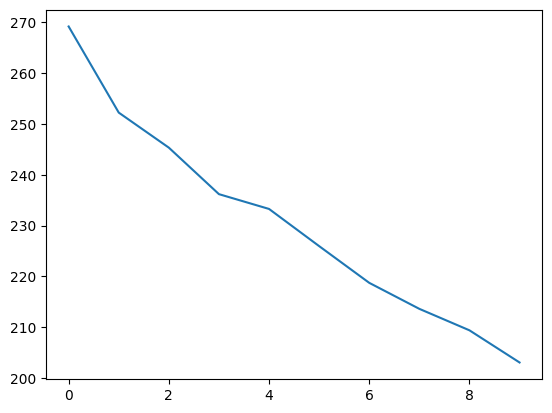

In [16]:
plt.plot(history.history["mse"])

In [17]:
# Import additionnal libraries

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
validation_loss = []
history_list = []

In [19]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [29]:
count = 0

for train_index, val_index in kfold.split(X_train, y_train) :
    model = create_model()

    stop = EarlyStopping(monitor = "val_mse", patience = 10, mode = "min")
    checkpoint = ModelCheckpoint("my_best_model" + str(count + 1) + ".keras", monitor = "val_mse", verbose = 0, save_best_only = True, mode = "min")
    callbacks = [stop, checkpoint]

    history = model.fit([X_train[train_index] for _ in range (16)], y_train[train_index], epochs = 100, callbacks = callbacks, batch_size = 10)
    history_list.append(history)
    validation_loss.append(model.evaluate([X_train[val_index] for _ in range (16)], y_train[val_index], return_dict = True, verbose = 0)["loss"])
    
    count += 1

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 136801.7188 - mse: 136801.7188
Epoch 2/100
 93/640 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3501.8406 - mse: 3501.8406

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_mse` which is not available. Available metrics are: loss,mse
  current = self.get_monitor_value(logs)
c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_mse available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2154.1736 - mse: 2154.1736
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 757.8248 - mse: 757.8248
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 592.9665 - mse: 592.9665
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 471.9142 - mse: 471.9142
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 444.8331 - mse: 444.8331
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 427.6312 - mse: 427.6312
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 395.0646 - mse: 395.0646
Epoch 9/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 388.4713 - mse: 388.4713
Epoch 10/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 371.3169 - mse: 371.3169
Epoch 11/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 357.8257 - mse: 357.8257
Epoch 12/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 340.6795 - mse: 340.6795
Epoch 13/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

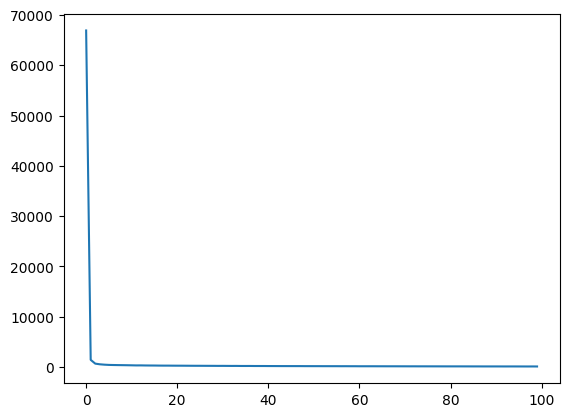

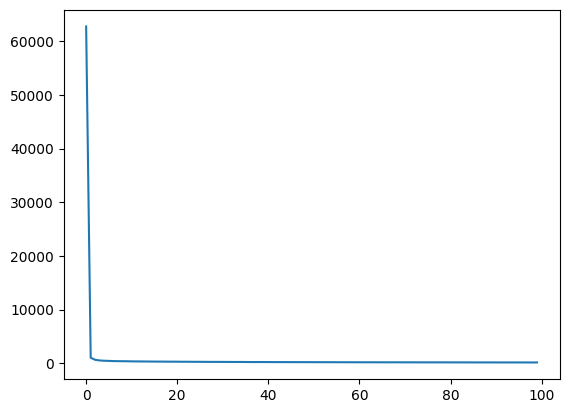

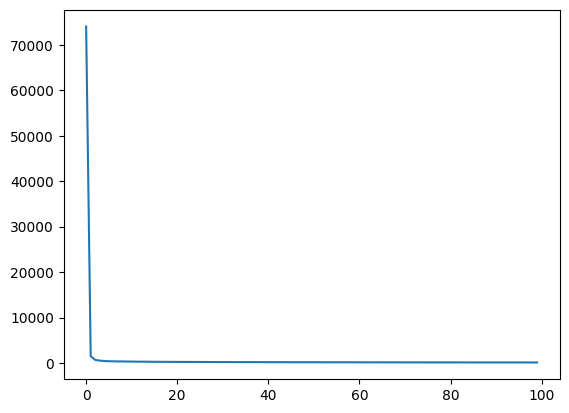

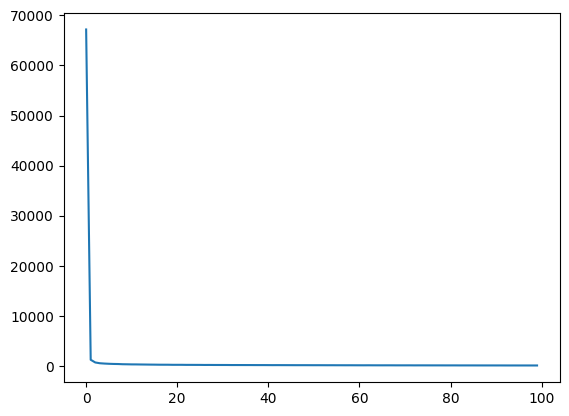

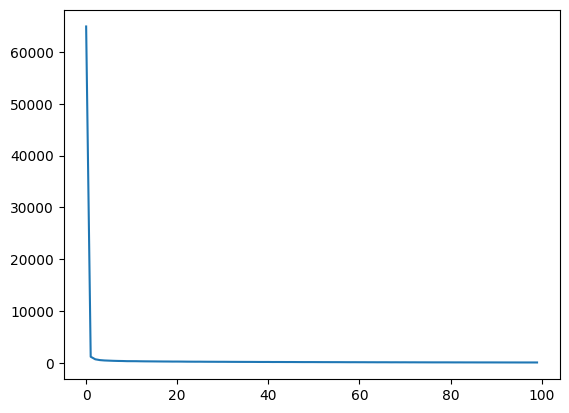

In [34]:
for hist in history_list :
    plt.plot(hist.history["loss"])
    plt.show()

In [35]:
print("average mse and standard deviation: ", np.mean(validation_loss), np.std(validation_loss))

average mse and standard deviation:  18.511379432678222 3.0914491052462574


In [36]:
all_model = []
for i in range (5) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [37]:
model_predict_moyenne = all_model[0].predict([X_test for _ in range (16)])

for i in range(1, 5) :
    model_predict_moyenne += all_model[i].predict([X_test for _ in range (16)])

model_predict_moyenne = np.round(model_predict_moyenne/10)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [38]:
print("mse : ", (1/1000)*np.sqrt(np.sum((model_predict_moyenne[:, 0] - y_test)**2)))

mse :  9.110421876767502


In [39]:
np.array([model_predict_moyenne[:, 0], y_test])[:, :5]

array([[464.     , 213.     , 330.     ,  11.     , 303.     ],
       [927.17741, 425.18517, 659.32114,  24.10143, 605.93609]])